<a href="https://colab.research.google.com/github/gabikohen/gabikohen-Ejercicio_simple_sobre_la_red_neuronal_-base-/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
file = "/content/drive/MyDrive/Colab Notebooks/Coding dojo/Machine learning avanzado/heart - heart.csv"
heart_df = pd.read_csv(file)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
heart_df.duplicated().sum()

0

In [7]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart_df["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [9]:
heart_df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [10]:
heart_df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
heart_df["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [12]:
heart_df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [13]:
heart_df["FastingBS"].unique()

array([0, 1])

In [14]:
heart_df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [15]:
heart_df["MaxHR"].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202])

In [16]:
heart_df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [17]:
heart_df["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [18]:
heart_df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [19]:
heart_df["HeartDisease"].unique()

array([0, 1])

In [20]:
heart_df['ChestPainType'].replace({'ATA': 0, 'NAP': 1,'ASY':2,'TA':3},inplace=True)

# **Divido en X e y**

In [21]:
X =heart_df.drop(columns = 'HeartDisease') # Feature Matrix
y =heart_df['HeartDisease'] # Target


In [22]:
heart_df["ChestPainType"].unique()

array([0, 1, 2, 3])

Realizar una división train-test en tus datos

In [23]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


Utilizar un transformador de columna para escalar las características numéricas y realizar una codificación one-hot a las características categóricas.

Instanciar selectores de columnas

In [24]:
cat_selector = make_column_selector(dtype_include="object")
int_selector = make_column_selector(dtype_include="int")
float_selector = make_column_selector(dtype_include="float")

In [25]:
cat_selector(X_train)

['Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [26]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [27]:
imputer_int = SimpleImputer(strategy="median")
imputer_float = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [28]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)


In [29]:
col_transformer = make_column_transformer(
    (make_pipeline(imputer_int, scaler), int_selector),
    (make_pipeline(imputer_float, scaler), float_selector),
    (make_pipeline(imputer_cat, one_hot_encoder), cat_selector),remainder='passthrough')

In [30]:
pipeline=make_pipeline(col_transformer)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa767d569b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa767d578e0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa767d57370>)]))])

In [31]:
#Entrenar preprocesamiento
pipeline.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa767d569b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa767d578e0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa767d57370>)]))])

In [32]:
#Transformar preprocesamiento - X_train y X_test
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

Defino mi estructura

In [33]:
input_shape =X_train_processed.shape[1]
input_shape

17

# **Inicio del MODELO **

Defino el modelo sequencial

Incluir el número de características para cada muestra en tu capa de entrada:

In [34]:
model = Sequential()
# First hidden layer
model.add(Dense(11,
                input_dim = input_shape,
                activation = 'relu'))
# Second hidden layer
model.add(Dense(5,
                activation = 'relu'))



Utilizar la función de activación correcta y el número correcto de neuronas para tu capa de salida

In [35]:

# Output layer - classificaiton problem.
model.add(Dense(1,
                activation = 'sigmoid'))


Compilar tu modelo con la función de pérdida correcta y un optimizador (“adam” es una buena opción)

In [36]:
model.compile(loss = 'bce', optimizer = 'adam')



Trazar el historial de entrenamiento de tu modelo

In [38]:
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed , y_test),
                    epochs = 30)


Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 0.6759 - val_loss: 0.6449
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6538 - val_loss: 0.6207
Epoch 3/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6315 - val_loss: 0.5924
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.6044 - val_loss: 0.5593
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 0.5716 - val_loss: 0.5176
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 0.5347 - val_loss: 0.4755
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.5010 - val_loss: 0.4355
Epoch 8/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4730 - val_loss: 0.4048
Epoch 9/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4516 - val_loss: 0.3781
Epoch 10/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4346 - val_loss: 0.3613
Epoch 11/30
22/22 

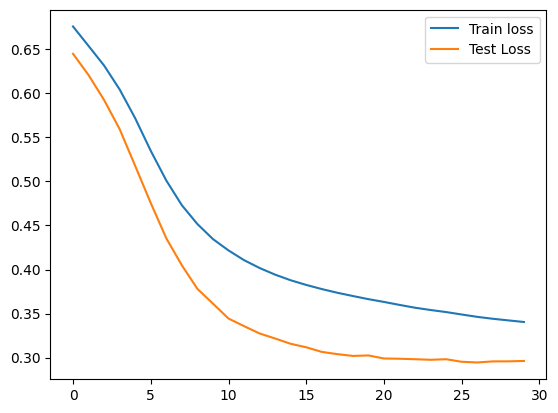

In [40]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();
plt.show()

Evaluar tu modelo con las métricas adecuadas.

In [46]:
train_preds = (model.predict(X_train_processed) >= 0.5).astype(float)
test_preds = (model.predict(X_test_processed) >= 0.5).astype(float)
print('-'*29 + ' Train Metrics ' + '-'*29)
print(classification_report(train_preds, y_train))
print('\n' + '-'*29 + ' Test Metrics ' + '-'*29)
print(classification_report(test_preds, y_test))


8/8 [==============================] - 0s 3ms/step
----------------------------- Train Metrics -----------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       285
         1.0       0.90      0.85      0.87       403

    accuracy                           0.86       688
   macro avg       0.85      0.86      0.85       688
weighted avg       0.86      0.86      0.86       688


----------------------------- Test Metrics -----------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       103
         1.0       0.89      0.88      0.89       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



En general, el modelo parece tener un rendimiento bastante bueno en ambos conjuntos de datos, con métricas de precision, recall y f1-score altas.
La precisión global (accuracy) es alta tanto en el conjunto de entrenamiento como en el de prueba, lo cual sugiere que el modelo generaliza bien a datos no vistos.
